In this notebook I want to explore, given 2 2D polyhedrons, how can I find out what all the possible contact modes there are between them and the corresponding contact locations, constraints, whether contact or no contact

In [1]:
from dataclasses import dataclass
from enum import Enum
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.geometry.convex_set import ConvexSet
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
import matplotlib.pyplot as plt

A original: [[0.000 1.000]
 [-0.447 -0.894]
 [1.000 0.000]]
b original: [0.000 0.000 1.000]
new_order: [1, 2, 0]
[[-0.000 0.000]
 [1.000 -0.500]
 [1.000 0.000]]
A [[-0.447 -0.894]
 [1.000 0.000]
 [0.000 1.000]]
b [0.000 1.000 0.000]


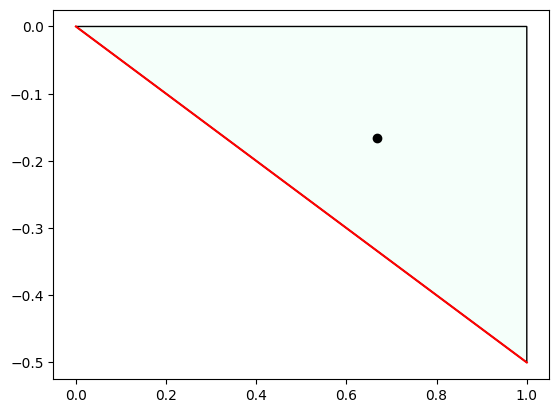

In [2]:
@dataclass
class ContactLocation():
    pass

@dataclass
class ContactLocationPoint(ContactLocation):
    pass

@dataclass
class ContactLocationEdge(ContactLocation):
    pass

@dataclass
class ContactLocationFace(ContactLocation):
    def __post_init__(self):
        raise NotImplementedError

class MobilityType(Enum):
    STATIC = 1
    UNACTUATED = 2
    ACTUATED = 3

@dataclass
class RigidBody:
    name: str
    geometry: Polyhedron # For now, only allow convex sets, and specifically polyhedra
    mobility_type: MobilityType

    @property
    def dimension(self):
        return self.geometry.dimension

# class ContactPairModeType(Enum):
#     NO_CONTACT = 1
#     SLIDING = 2


@dataclass
class ContactPairMode():
    """Contact mode between two contact locations on two rigid bodies"""
    body_a: RigidBody
    body_b: RigidBody    

class InContactPairMode(ContactPairMode):
    contact_location_a: ContactLocation
    contact_location_b: ContactLocation

class NoContactPairMode(ContactPairMode):
    pass

# obs = RigidBody(name="obstacle", geometry=Polyhedron.from_vertices([[0, 0], [1, 0], [0, -1]]), mobility_type=MobilityType.STATIC)
obj = RigidBody(name="object", geometry=Polyhedron.from_vertices([[0, 0], [1, 0], [1, -0.5]]), mobility_type=MobilityType.ACTUATED)
obj.geometry.plot(mark_center=True)
print(obj.geometry.vertices)
print("A", obj.geometry.set.A())
print("b", obj.geometry.set.b())
obj.geometry.plot_face(0, color="r")
# obj.geometry.plot_halfspace(2, color="blue", alpha=0.5, linestyle="-.")

In [3]:
a = np.array([1, 2, 3])
a = a[[2,0,1]]
print(a)

[3 1 2]
